#I. Import Packages

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

#II. Import Data

In [55]:
news_df = pd.read_csv('https://raw.githubusercontent.com/NehemiahSolis/Online_News_Popularity/master/OnlineNewsPopularity.csv')
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [56]:
news_df.columns #List of all columns in the dataset for future reference

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [57]:
news_df.drop(columns=['url',' timedelta'],inplace=True) #Dropping the first two columns as they are irrelevant for the model
news_df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


#III. Data Cleaning

##Data Cleaning: Variable Type and Missing Values

In [58]:
# Helps check for variable types. There are categorical and continuous variables

news_df.nunique().sort_values(ascending=False)

 LDA_02                           39525
 LDA_04                           39370
 LDA_00                           39337
 kw_avg_avg                       39300
 LDA_01                           39098
 LDA_03                           38963
 global_sentiment_polarity        34695
 global_subjectivity              34501
 kw_avg_max                       30834
 average_token_length             30136
 avg_positive_polarity            27301
 n_unique_tokens                  27281
 n_non_stop_unique_tokens         22930
 kw_max_avg                       19438
 kw_avg_min                       17003
 kw_min_avg                       15982
 avg_negative_polarity            13841
 global_rate_positive_words       13159
 global_rate_negative_words       10271
 self_reference_avg_sharess        8626
 n_tokens_content                  2406
 rate_positive_words               2284
 rate_negative_words               2284
 shares                            1454
 n_non_stop_words                  1451


In [59]:
# In order to find the yes/no columns (categorical) for future exploration:
print(news_df.loc[:, news_df.nunique() < 3].columns)

# List of the continuos variables:
print(news_df.loc[:, news_df.nunique() > 2].columns)

Index([' data_channel_is_lifestyle', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday',
       ' is_weekend'],
      dtype='object')
Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess', ' LDA_00',
       ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_se

In [60]:
# Now we check for any potential NULL values.

news_df.isnull() 

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39640,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39641,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [61]:
# There doesn't appear to be any missing values. Let's double check

news_df.isnull().sum()*100/news_df.isnull().count()

 n_tokens_title                   0.0
 n_tokens_content                 0.0
 n_unique_tokens                  0.0
 n_non_stop_words                 0.0
 n_non_stop_unique_tokens         0.0
 num_hrefs                        0.0
 num_self_hrefs                   0.0
 num_imgs                         0.0
 num_videos                       0.0
 average_token_length             0.0
 num_keywords                     0.0
 data_channel_is_lifestyle        0.0
 data_channel_is_entertainment    0.0
 data_channel_is_bus              0.0
 data_channel_is_socmed           0.0
 data_channel_is_tech             0.0
 data_channel_is_world            0.0
 kw_min_min                       0.0
 kw_max_min                       0.0
 kw_avg_min                       0.0
 kw_min_max                       0.0
 kw_max_max                       0.0
 kw_avg_max                       0.0
 kw_min_avg                       0.0
 kw_max_avg                       0.0
 kw_avg_avg                       0.0
 self_refere

##Data Cleaning: Outlier Detection

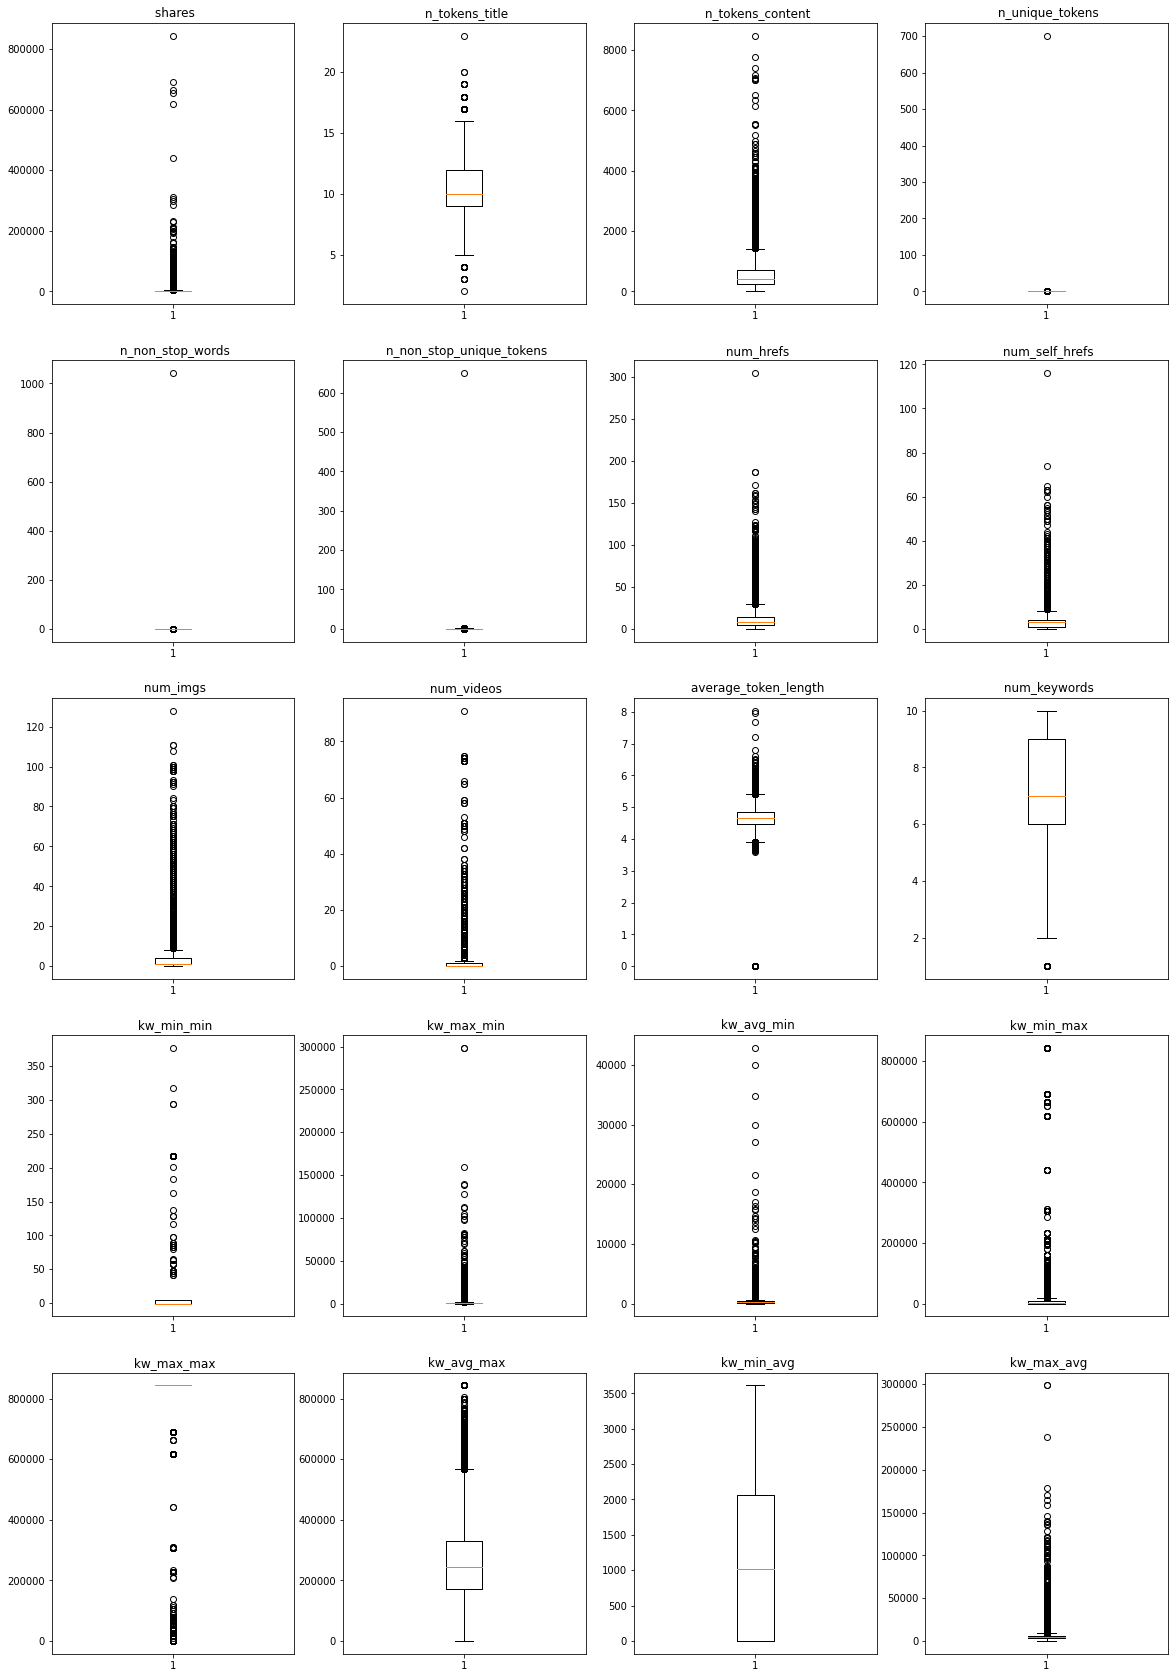

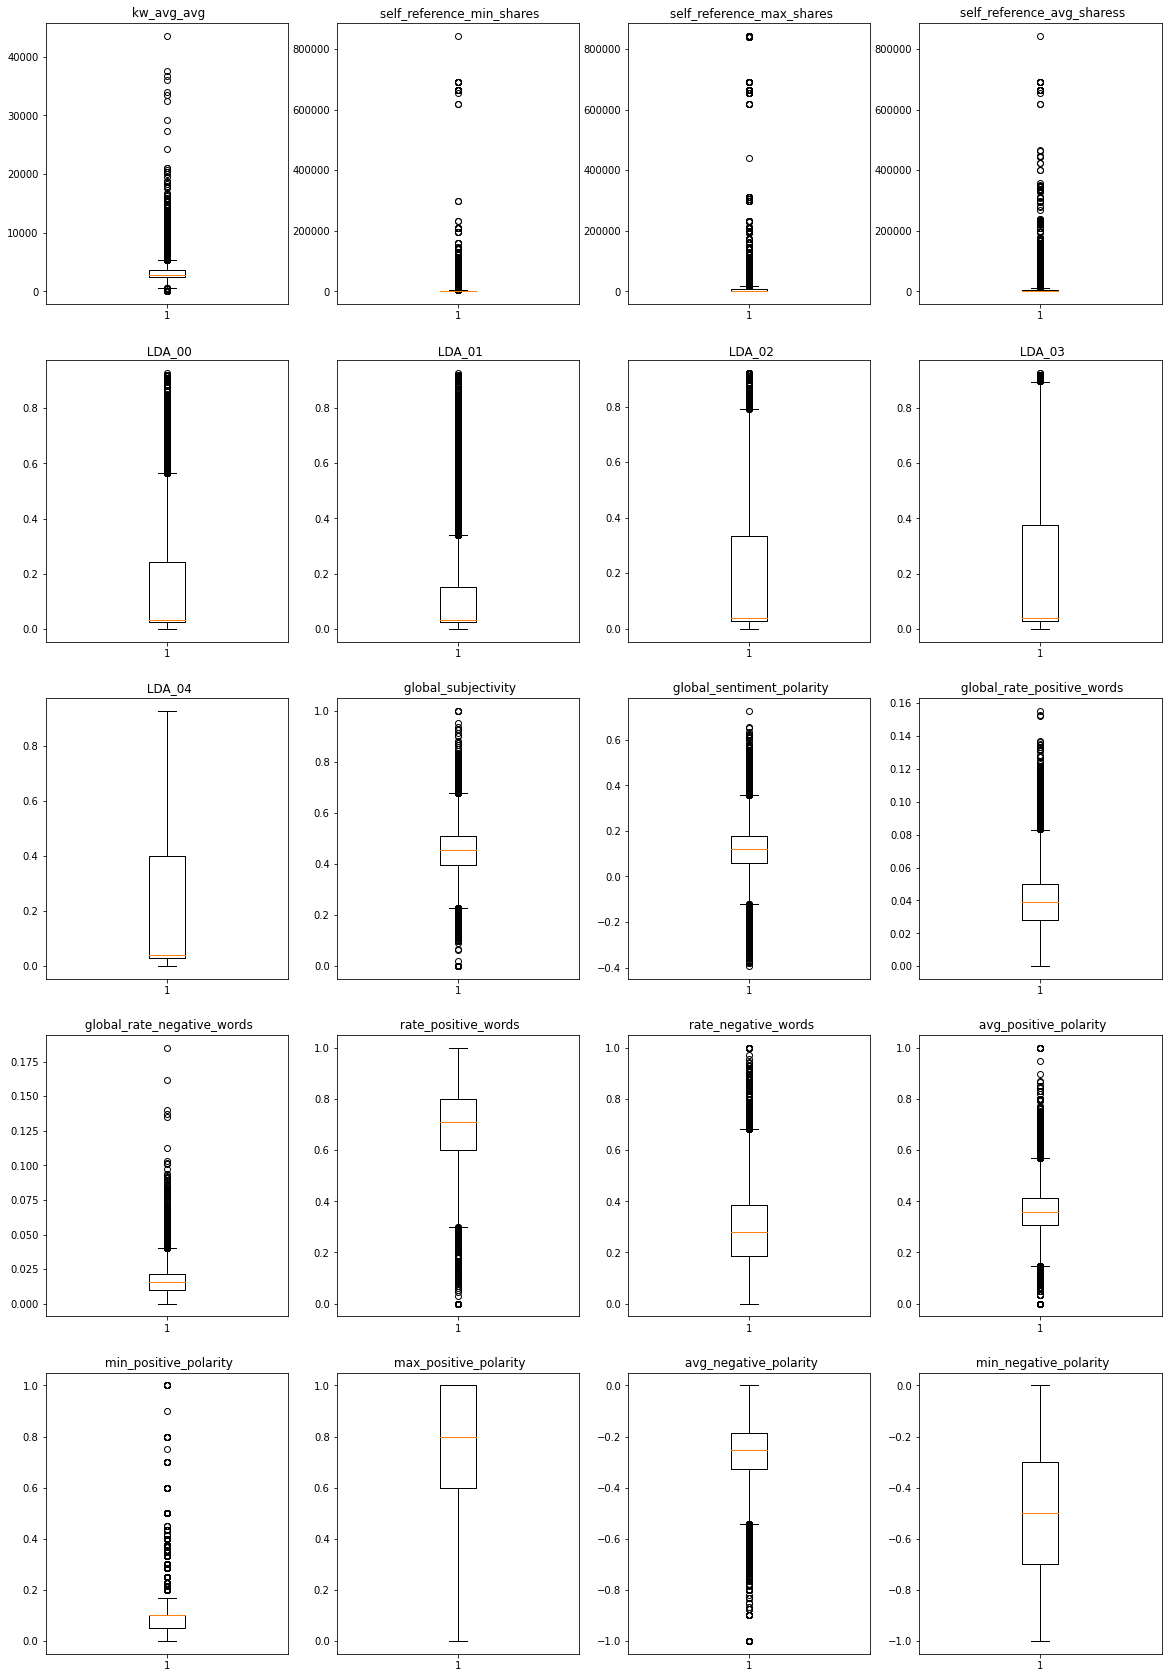

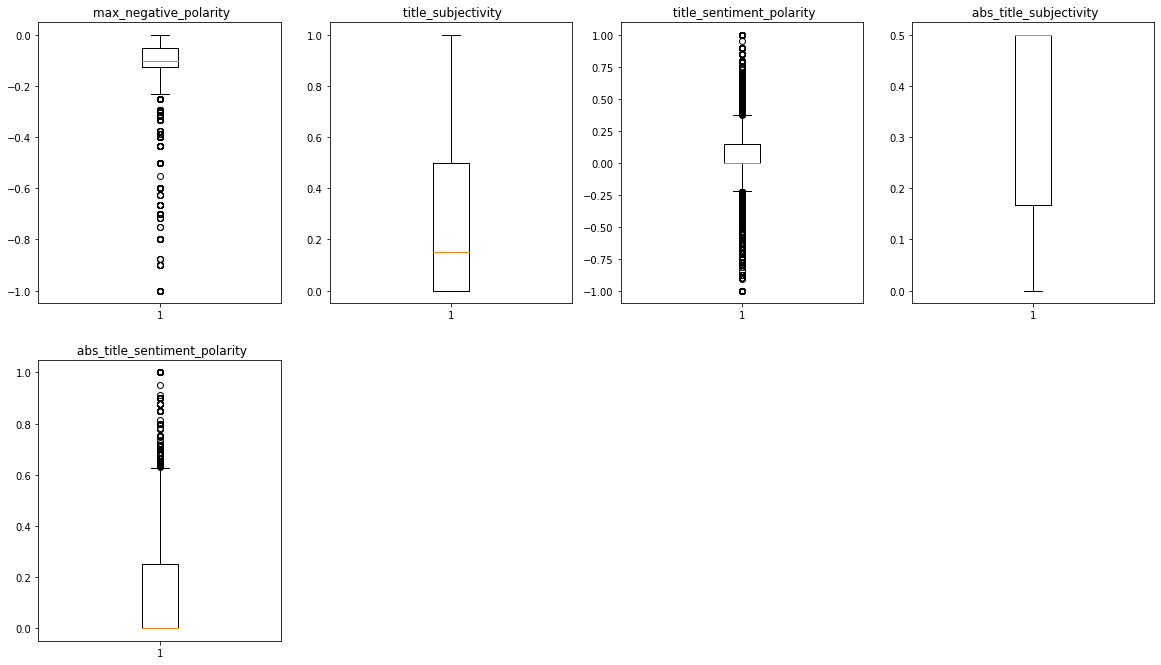

In [62]:
# Create a dictionary for each column for ease of graphing for variables that aren't yes/no questions

news_dict = {' shares':1,' n_tokens_title':2, ' n_tokens_content':3, ' n_unique_tokens':4,
       ' n_non_stop_words':5, ' n_non_stop_unique_tokens':6, ' num_hrefs':7, 
       ' num_self_hrefs':8, ' num_imgs':9, ' num_videos':10,' average_token_length':11, 
       ' num_keywords':12, ' kw_min_min':13,' kw_max_min':14, ' kw_avg_min':15,' kw_min_max':16, 
       ' kw_max_max':17, ' kw_avg_max':18, ' kw_min_avg':19,' kw_max_avg':20}
       
news_dict_2 = {' kw_avg_avg':1, ' self_reference_min_shares':2, ' self_reference_max_shares':3,
               ' self_reference_avg_sharess':4,' LDA_00':5, ' LDA_01':6, ' LDA_02':7,' LDA_03':8, 
               ' LDA_04':9, ' global_subjectivity':10,' global_sentiment_polarity':11, 
               ' global_rate_positive_words':12,' global_rate_negative_words':13, ' rate_positive_words':14,
               ' rate_negative_words':15, ' avg_positive_polarity':16,' min_positive_polarity':17,
               ' max_positive_polarity':18,' avg_negative_polarity':19, ' min_negative_polarity':20}
              
news_dict_3 = {' max_negative_polarity':1, ' title_subjectivity':2,' title_sentiment_polarity':3,
               ' abs_title_subjectivity':4,' abs_title_sentiment_polarity':5}

plt.figure(figsize=(20,30))

for variable1,i in news_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(news_df[variable1],whis=1.5)
  plt.title(variable1)

plt.show()

plt.figure(figsize=(20,30))
for variable2,i in news_dict_2.items():
  plt.subplot(5,4,i)
  plt.boxplot(news_df[variable2],whis=1.5)
  plt.title(variable2)

plt.show()

plt.figure(figsize=(20,30))
for variable3,i in news_dict_3.items():
  plt.subplot(5,4,i)
  plt.boxplot(news_df[variable3],whis=1.5)
  plt.title(variable3)

plt.show()

As we can see visually, there are a lot of variables that have outliers. Let's use Tukey's method to detect those outliers.

In [63]:
for variable in news_dict.keys():
  q75, q25 = np.percentile(news_df[variable], [75 ,25])
  iqr = q75 - q25

  min_val = q25 - (iqr*1.5)
  max_val = q75 + (iqr*1.5)
  print('Number of outliers in {}: {}, with a percentage of {} being outliers'.format(variable,
      len((np.where((news_df[variable] > max_val) | (news_df[variable] < min_val))[0])),
      len((np.where((news_df[variable] > max_val) | (news_df[variable] < min_val))[0]))*100/news_df[variable].count()))

for variable in news_dict_2.keys():
  q75, q25 = np.percentile(news_df[variable], [75 ,25])
  iqr = q75 - q25

  min_val = q25 - (iqr*1.5)
  max_val = q75 + (iqr*1.5)
  print('Number of outliers in {}: {}, with a percentage of {} being outliers'.format(variable,
      len((np.where((news_df[variable] > max_val) | (news_df[variable] < min_val))[0])),
      len((np.where((news_df[variable] > max_val) | (news_df[variable] < min_val))[0]))*100/news_df[variable].count()))

for variable in news_dict_3.keys():
  q75, q25 = np.percentile(news_df[variable], [75 ,25])
  iqr = q75 - q25

  min_val = q25 - (iqr*1.5)
  max_val = q75 + (iqr*1.5)
  print('Number of outliers in {}: {}, with a percentage of {} being outliers'.format(variable,
      len((np.where((news_df[variable] > max_val) | (news_df[variable] < min_val))[0])),
      len((np.where((news_df[variable] > max_val) | (news_df[variable] < min_val))[0]))*100/news_df[variable].count()))


Number of outliers in  shares: 4541, with a percentage of 11.454444556553325 being outliers
Number of outliers in  n_tokens_title: 156, with a percentage of 0.3935021693068308 being outliers
Number of outliers in  n_tokens_content: 1933, with a percentage of 4.875895469680153 being outliers
Number of outliers in  n_unique_tokens: 1604, with a percentage of 4.04600948441126 being outliers
Number of outliers in  n_non_stop_words: 2827, with a percentage of 7.130965593784683 being outliers
Number of outliers in  n_non_stop_unique_tokens: 1733, with a percentage of 4.37140550903037 being outliers
Number of outliers in  num_hrefs: 2169, with a percentage of 5.471193623246897 being outliers
Number of outliers in  num_self_hrefs: 2090, with a percentage of 5.271920088790233 being outliers
Number of outliers in  num_imgs: 7703, with a percentage of 19.430430834426396 being outliers
Number of outliers in  num_videos: 2946, with a percentage of 7.431137120371305 being outliers
Number of outliers

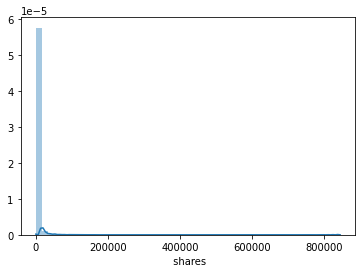

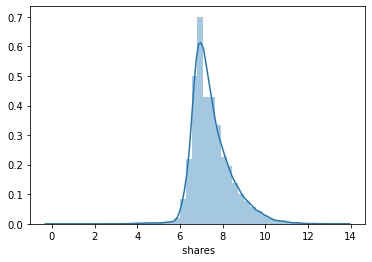

In [64]:
# Since shares is our target variable, I think a log transformation would be best to treat it's 
# outrageous outliers

sns.distplot(news_df[' shares'])
plt.show()
print()
sns.distplot(news_df[' shares'].apply(np.log))
plt.show()

#IV. Exploratory Analysis

##Univariate Analysis

*Continuous Variables*

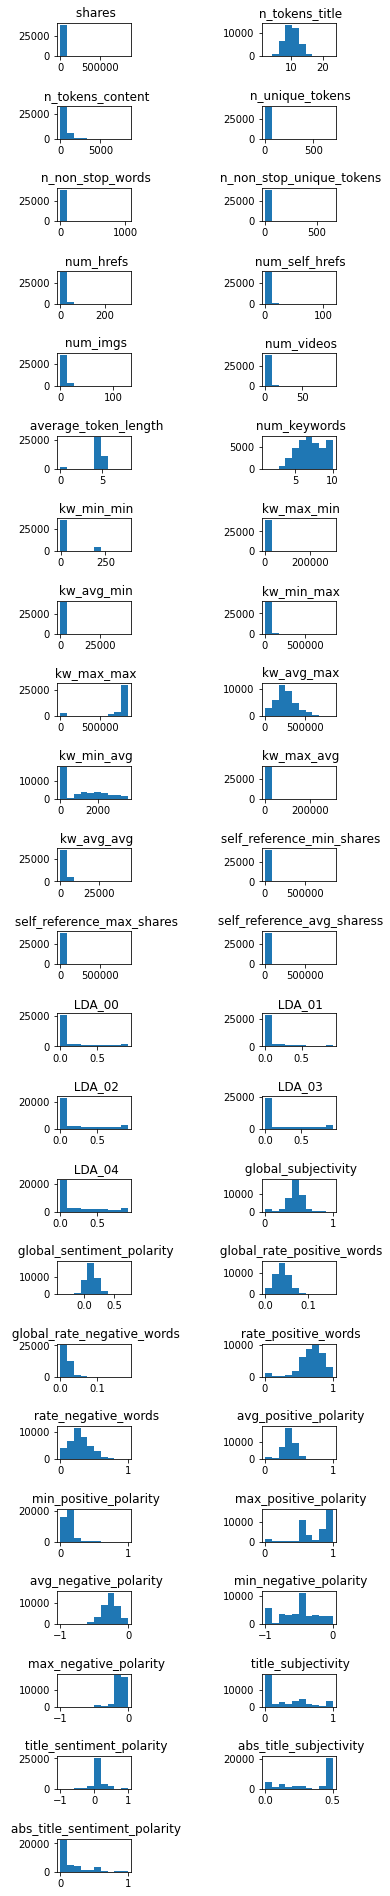

In [65]:
columns = [' shares', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess', ' LDA_00',
       ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity']

plt.figure(figsize=(5,75))

for i in range(len(columns)):
  plt.subplot(50,2,i+1)
  plt.subplots_adjust(wspace=1.75,hspace=1.5)
  plt.hist(news_df[columns[i]])
  plt.title(columns[i])

plt.show()


##Bivariate Analysis

###Continuous variables

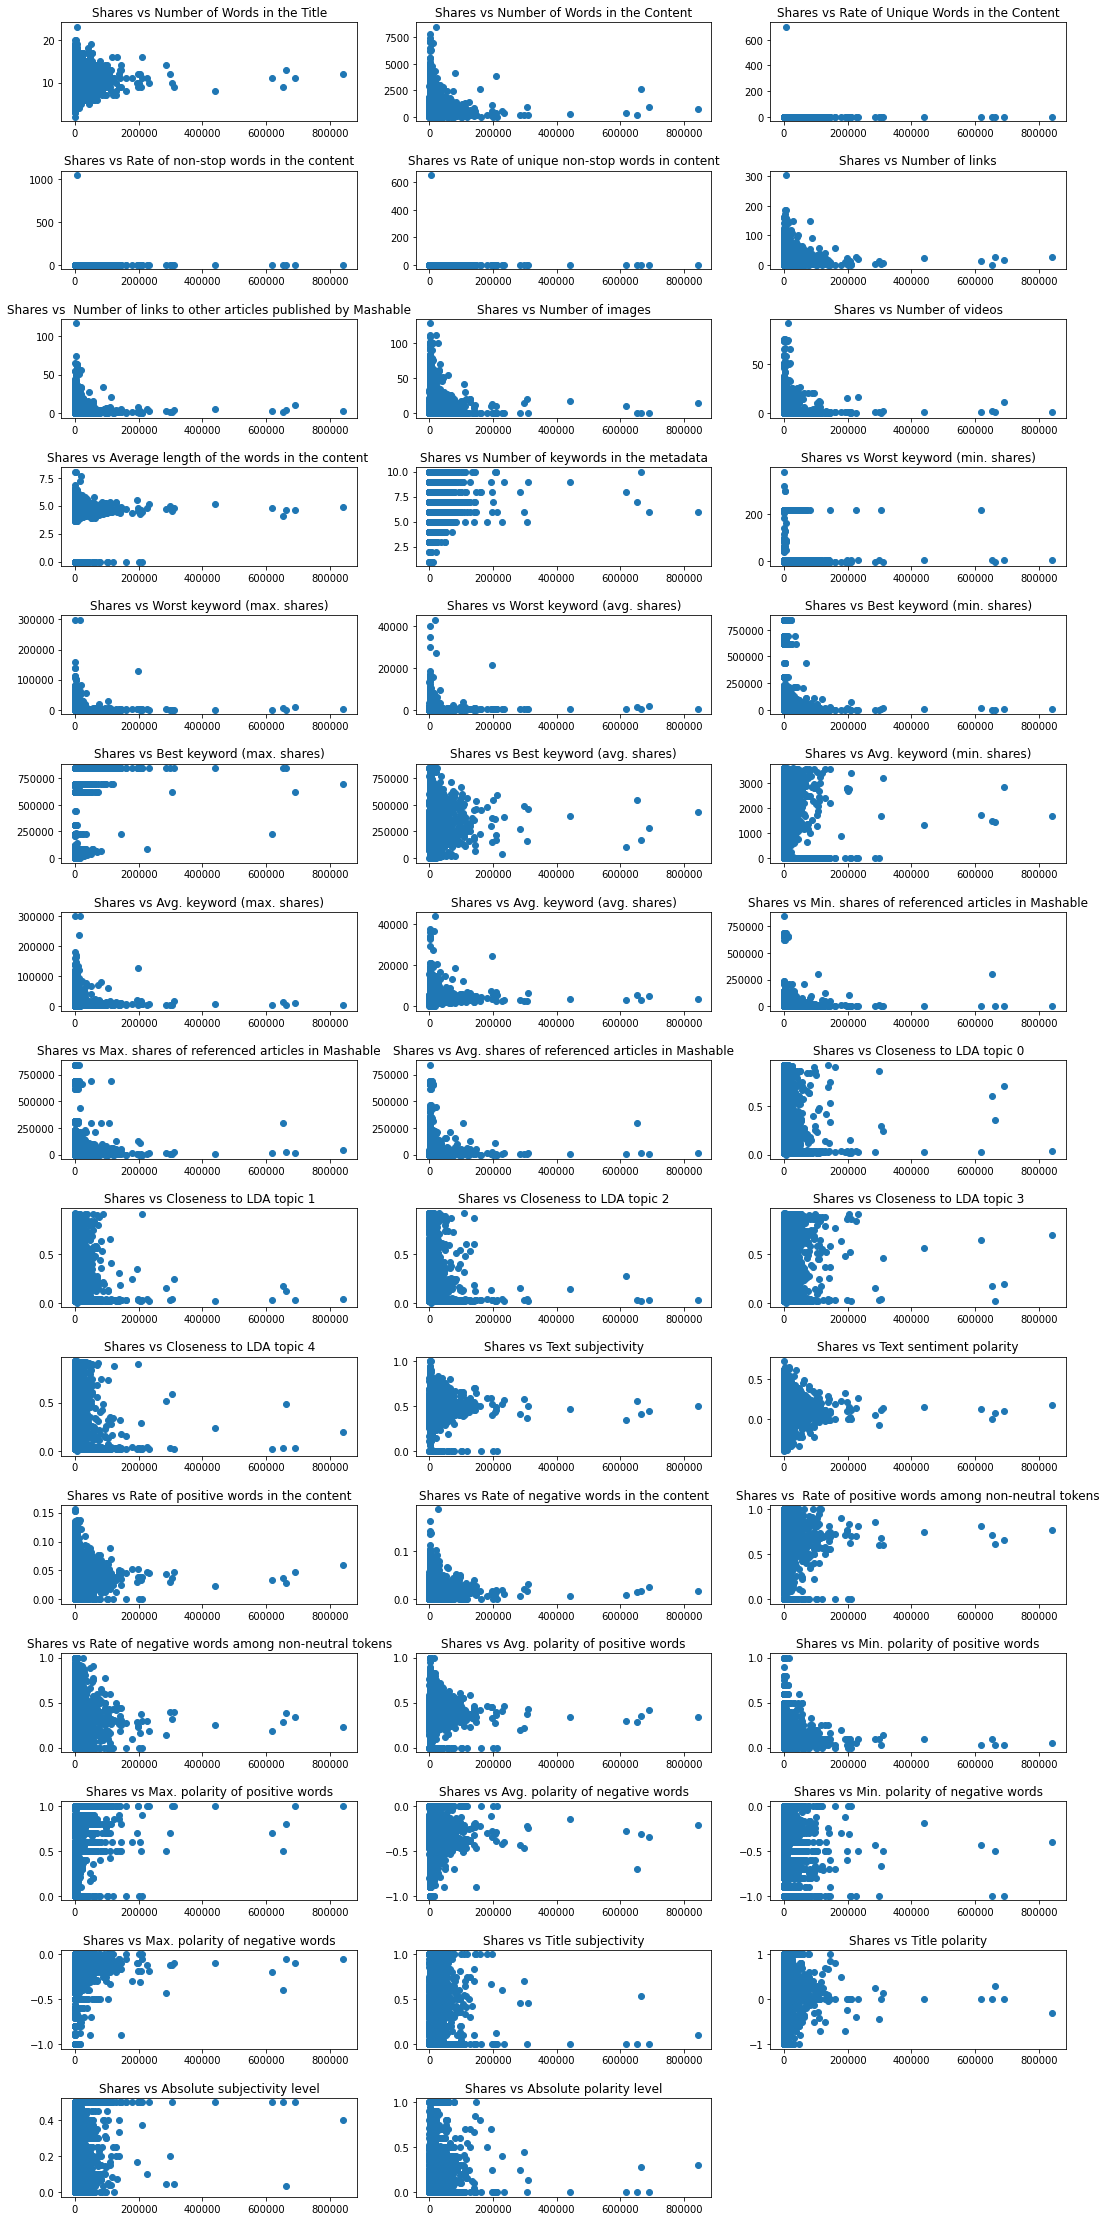

In [66]:
# All continuous variables


plt.figure(figsize=(18,40))
plt.subplots_adjust(hspace=.5)


plt.subplot(15,3,1)
plt.scatter(news_df[' shares'], news_df[' n_tokens_title'])
plt.title('Shares vs Number of Words in the Title')

plt.subplot(15,3,2)
plt.scatter(news_df[' shares'], news_df[' n_tokens_content'])
plt.title('Shares vs Number of Words in the Content')

plt.subplot(15,3,3)
plt.scatter(news_df[' shares'], news_df[' n_unique_tokens'])
plt.title('Shares vs Rate of Unique Words in the Content')

plt.subplot(15,3,4)
plt.scatter(news_df[' shares'], news_df[' n_non_stop_words'])
plt.title('Shares vs Rate of non-stop words in the content')

plt.subplot(15,3,5)
plt.scatter(news_df[' shares'], news_df[' n_non_stop_unique_tokens'])
plt.title('Shares vs Rate of unique non-stop words in content')

plt.subplot(15,3,6)
plt.scatter(news_df[' shares'], news_df[' num_hrefs'])
plt.title('Shares vs Number of links')

plt.subplot(15,3,7)
plt.scatter(news_df[' shares'], news_df[' num_self_hrefs'])
plt.title('Shares vs  Number of links to other articles published by Mashable')

plt.subplot(15,3,8)
plt.scatter(news_df[' shares'], news_df[' num_imgs'])
plt.title('Shares vs Number of images')

plt.subplot(15,3,9)
plt.scatter(news_df[' shares'], news_df[' num_videos'])
plt.title('Shares vs Number of videos')

plt.subplot(15,3,10)
plt.scatter(news_df[' shares'], news_df[' average_token_length'])
plt.title('Shares vs Average length of the words in the content ')

plt.subplot(15,3,11)
plt.scatter(news_df[' shares'], news_df[' num_keywords'])
plt.title('Shares vs Number of keywords in the metadata')

plt.subplot(15,3,12)
plt.scatter(news_df[' shares'], news_df[' kw_min_min'])
plt.title('Shares vs Worst keyword (min. shares)')

plt.subplot(15,3,13)
plt.scatter(news_df[' shares'], news_df[' kw_max_min'])
plt.title('Shares vs Worst keyword (max. shares)')

plt.subplot(15,3,14)
plt.scatter(news_df[' shares'], news_df[' kw_avg_min'])
plt.title('Shares vs Worst keyword (avg. shares)')

plt.subplot(15,3,15)
plt.scatter(news_df[' shares'], news_df[' kw_min_max'])
plt.title('Shares vs Best keyword (min. shares)')

plt.subplot(15,3,16)
plt.scatter(news_df[' shares'], news_df[' kw_max_max'])
plt.title('Shares vs Best keyword (max. shares)')

plt.subplot(15,3,17)
plt.scatter(news_df[' shares'], news_df[' kw_avg_max'])
plt.title('Shares vs Best keyword (avg. shares)')

plt.subplot(15,3,18)
plt.scatter(news_df[' shares'], news_df[' kw_min_avg'])
plt.title('Shares vs Avg. keyword (min. shares)')

plt.subplot(15,3,19)
plt.scatter(news_df[' shares'], news_df[' kw_max_avg'])
plt.title('Shares vs Avg. keyword (max. shares)')

plt.subplot(15,3,20)
plt.scatter(news_df[' shares'], news_df[' kw_avg_avg'])
plt.title('Shares vs Avg. keyword (avg. shares)')

plt.subplot(15,3,21)
plt.scatter(news_df[' shares'], news_df[' self_reference_min_shares'])
plt.title('Shares vs Min. shares of referenced articles in Mashable')

plt.subplot(15,3,22)
plt.scatter(news_df[' shares'], news_df[' self_reference_max_shares'])
plt.title('Shares vs Max. shares of referenced articles in Mashable')

plt.subplot(15,3,23)
plt.scatter(news_df[' shares'], news_df[' self_reference_avg_sharess'])
plt.title('Shares vs Avg. shares of referenced articles in Mashable')

plt.subplot(15,3,24)
plt.scatter(news_df[' shares'], news_df[' LDA_00'])
plt.title('Shares vs Closeness to LDA topic 0')

plt.subplot(15,3,25)
plt.scatter(news_df[' shares'], news_df[' LDA_01'])
plt.title('Shares vs Closeness to LDA topic 1')

plt.subplot(15,3,26)
plt.scatter(news_df[' shares'], news_df[' LDA_02'])
plt.title('Shares vs Closeness to LDA topic 2')

plt.subplot(15,3,27)
plt.scatter(news_df[' shares'], news_df[' LDA_03'])
plt.title('Shares vs Closeness to LDA topic 3')

plt.subplot(15,3,28)
plt.scatter(news_df[' shares'], news_df[' LDA_04'])
plt.title('Shares vs Closeness to LDA topic 4')

plt.subplot(15,3,29)
plt.scatter(news_df[' shares'], news_df[' global_subjectivity'])
plt.title('Shares vs Text subjectivity')

plt.subplot(15,3,30)
plt.scatter(news_df[' shares'], news_df[' global_sentiment_polarity'])
plt.title('Shares vs Text sentiment polarity')

plt.subplot(15,3,31)
plt.scatter(news_df[' shares'], news_df[' global_rate_positive_words'])
plt.title('Shares vs Rate of positive words in the content')

plt.subplot(15,3,32)
plt.scatter(news_df[' shares'], news_df[' global_rate_negative_words'])
plt.title('Shares vs Rate of negative words in the content')

plt.subplot(15,3,33)
plt.scatter(news_df[' shares'], news_df[' rate_positive_words'])
plt.title('Shares vs  Rate of positive words among non-neutral tokens')

plt.subplot(15,3,34)
plt.scatter(news_df[' shares'], news_df[' rate_negative_words'])
plt.title('Shares vs Rate of negative words among non-neutral tokens')

plt.subplot(15,3,35)
plt.scatter(news_df[' shares'], news_df[' avg_positive_polarity'])
plt.title('Shares vs Avg. polarity of positive words')

plt.subplot(15,3,36)
plt.scatter(news_df[' shares'], news_df[' min_positive_polarity'])
plt.title('Shares vs Min. polarity of positive words')

plt.subplot(15,3,37)
plt.scatter(news_df[' shares'], news_df[' max_positive_polarity'])
plt.title('Shares vs Max. polarity of positive words')

plt.subplot(15,3,38)
plt.scatter(news_df[' shares'], news_df[' avg_negative_polarity'])
plt.title('Shares vs Avg. polarity of negative words')

plt.subplot(15,3,39)
plt.scatter(news_df[' shares'], news_df[' min_negative_polarity'])
plt.title('Shares vs Min. polarity of negative words')

plt.subplot(15,3,40)
plt.scatter(news_df[' shares'], news_df[' max_negative_polarity'])
plt.title('Shares vs Max. polarity of negative words')

plt.subplot(15,3,41)
plt.scatter(news_df[' shares'], news_df[' title_subjectivity'])
plt.title('Shares vs Title subjectivity')

plt.subplot(15,3,42)
plt.scatter(news_df[' shares'], news_df[' title_sentiment_polarity'])
plt.title('Shares vs Title polarity')

plt.subplot(15,3,43)
plt.scatter(news_df[' shares'], news_df[' abs_title_subjectivity'])
plt.title('Shares vs Absolute subjectivity level')

plt.subplot(15,3,44)
plt.scatter(news_df[' shares'], news_df[' abs_title_sentiment_polarity'])
plt.title('Shares vs Absolute polarity level')

plt.show()

In [67]:
# Correlation for continuous variables

cont_news_df = news_df.filter(news_df[columns],axis=1)
cont_news_df.corr()

,shares,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
shares,1.000000,0.008783,0.002459,0.000806,0.000443,0.000114,0.045404,-0.001900,0.039388,0.023936,-0.022007,0.021818,-0.001051,0.030114,0.030406,0.003901,0.007863,0.044686,0.039551,0.064306,0.110413,0.055958,0.047115,0.057789,-0.003793,-0.010183,-0.059163,0.083771,-0.016622,0.031604,0.004163,0.000543,0.006615,-0.013241,-0.005183,0.012142,-0.000040,0.010068,-0.032029,-0.019297,-0.019300,0.021967,0.012772,0.001481,0.027135
n_tokens_title,0.008783,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,-0.071403,-0.006077,-0.110672,-0.005890,-0.031400,0.012926,0.120841,0.115746,-0.002370,0.006918,0.004296,-0.004563,0.000128,0.000661,-0.070038,0.063568,0.038365,0.042208,-0.065063,-0.056804,-0.072226,-0.064951,0.015530,-0.066589,0.034186,-0.049619,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550
n_tokens_content,0.002459,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,0.167789,0.072845,-0.054345,0.000066,-0.003545,-0.022786,0.058860,-0.096460,-0.022286,-0.030496,-0.079624,-0.030686,0.025657,-0.013809,0.026218,-0.009724,0.087266,-0.140141,0.041265,0.127879,0.021937,0.133979,0.125013,0.098960,0.101053,0.135123,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439
n_unique_tokens,0.000806,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,0.026407,-0.003679,0.001601,-0.000552,-0.000826,0.000577,-0.001624,0.000805,0.004563,-0.002120,-0.002083,0.001036,-0.000222,0.001992,-0.002213,-0.000827,-0.006855,-0.003689,-0.004260,-0.000180,0.000523,0.000014,-0.000877,-0.000667,-0.001657,-0.000487,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217
n_non_stop_words,0.000443,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,0.031554,-0.001439,-0.000352,-0.000595,-0.000892,-0.000553,0.000394,-0.002939,0.003284,-0.003408,-0.005415,0.000339,0.000170,0.001614,-0.001031,-0.002869,-0.003286,-0.009761,-0.001072,0.002565,0.000831,0.001535,0.001036,0.002421,0.001245,0.002285,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391
n_non_stop_unique_tokens,0.000114,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,0.034185,-0.004440,0.002001,-0.000615,-0.000644,-0.000089,-0.002032,-0.002006,0.002510,-0.003694,-0.005944,0.000989,-0.000077,0.002009,0.000342,-0.000965,-0.004965,-0.009781,-0.002097,0.005498,0.002043,0.005002,0.002590,0.005258,0.001709,0.004671,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342
num_hrefs,0.045404,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,0.222588,0.125890,-0.043263,0.012844,0.008307,-0.020150,0.051265,-0.019269,0.058920,0.069692,0.121419,-0.004804,0.080394,0.025239,-0.020100,-0.053803,-0.012531,0.123786,-0.054977,0.203464,0.086859,0.056428,0.032515,0.101663,0.059817,0.188236,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525
num_self_hrefs,-0.001900,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,0.126879,0.099578,-0.012896,-0.001233,-0.001286,-0.025

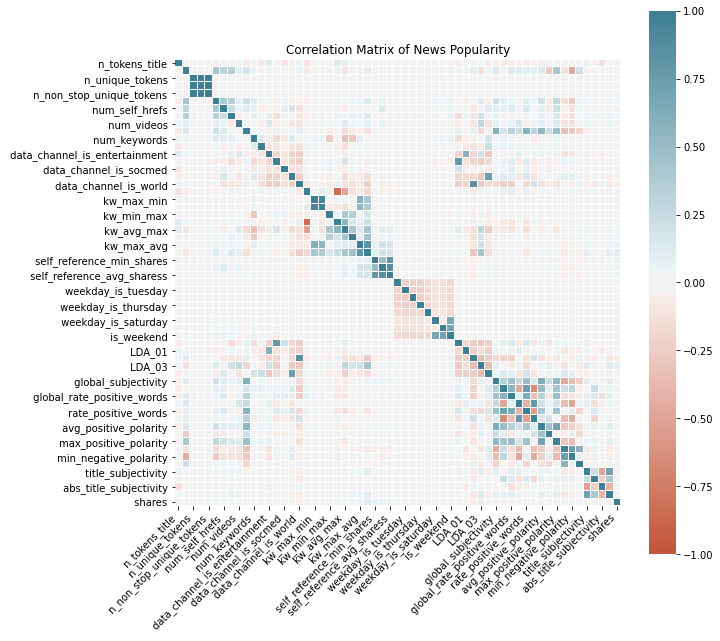

In [68]:
# Now to visualize these correlations, I have plotted the heat map

plt.figure(figsize=(10,10))
ax = sns.heatmap(
    news_df.corr(), 
    vmin = -1, vmax=1, center=0,
    square=True,
    cmap=sns.diverging_palette(20,220,n=200), 
    linewidth=.005)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Correlation Matrix of News Popularity')
plt.show()

###Categorical variables

Mean news article shares: 3395.3801836343455
Median news article shares: 1400.0



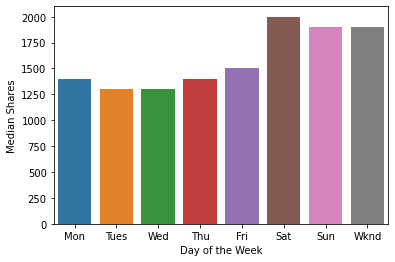

In [69]:
# Now, we can also take a look at the median amount of shares per day

mean, median = news_df[' shares'].mean(),news_df[' shares'].median()
print('Mean news article shares: {}'.format(mean))
print('Median news article shares: {}'.format(median))
print()

dow = []
for day in [' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',' weekday_is_thursday', 
            ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend']:
  dow.append(news_df[news_df[day]==1][' shares'].median())

ax = sns.barplot(x=['Mon','Tues','Wed','Thu','Fri','Sat','Sun','Wknd'],y=dow)
ax.set(xlabel='Day of the Week',ylabel='Median Shares')
plt.show()

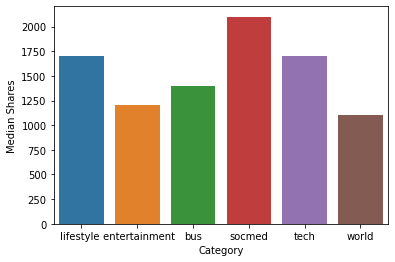

In [70]:
# Let's do the same for type of news article

category = []
for channel in [' data_channel_is_lifestyle',' data_channel_is_entertainment', ' data_channel_is_bus',
                ' data_channel_is_socmed', ' data_channel_is_tech',' data_channel_is_world']:
  category.append(news_df[news_df[channel]==1][' shares'].median())

ax = sns.barplot(x=['lifestyle ',' entertainment','bus','socmed','tech','world'], y=category)
ax.set(xlabel='Category', ylabel='Median Shares')
plt.show()
 

#V. Feature Engineering

As we saw in the previous section, there are many attributes in this dataset (over 50!) and each one has a different range. To account for this, I'll normalize the data to all fit in a range of 0 to 1. This will be especially helpful for future Principle Components Analysis.

In order to perform PCA and other feature engineering methods, I'll also want to split my data into two classifications: Popular and Unpopular News. I've already determined the split: 1400 shares, or the median of the winsorized shares data.

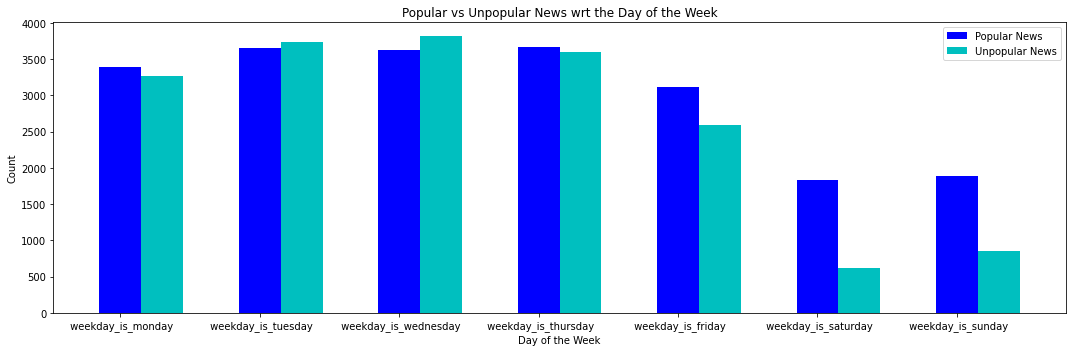

In [71]:
unpopular_news = news_df[news_df[' shares']<1400]
popular_news = news_df[news_df[' shares']>=1400]

# Visualizing the day of the week features

day_of_week = news_df.columns.values[29:36]

unpop_day = unpopular_news[day_of_week].sum().values
pop_day = popular_news[day_of_week].sum().values

fig = plt.figure(figsize=(15,5))
plt.title('Popular vs Unpopular News wrt the Day of the Week')
plt.bar(np.arange(len(day_of_week)), pop_day, width=0.3,align='center',color='b', label='Popular News')
plt.bar(np.arange(len(day_of_week)) + 0.3, unpop_day, width=0.3,align='center',color='c',label='Unpopular News')
plt.xticks(np.arange(len(day_of_week)),day_of_week)
plt.ylabel('Count')
plt.xlabel('Day of the Week')
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

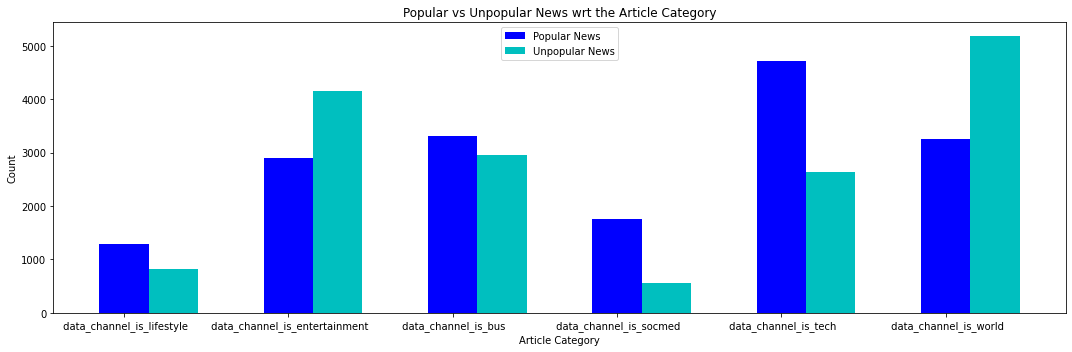

In [72]:
# Visualizing the article category features

data_channel = news_df.columns.values[11:17]

unpop_chan = unpopular_news[data_channel].sum().values
pop_chan = popular_news[data_channel].sum().values

fig = plt.figure(figsize=(15,5))
plt.title('Popular vs Unpopular News wrt the Article Category')
plt.bar(np.arange(len(data_channel)), pop_chan, width=0.3,align='center',color='b', label='Popular News')
plt.bar(np.arange(len(data_channel)) + 0.3, unpop_chan, width=0.3,align='center',color='c',label='Unpopular News')
plt.xticks(np.arange(len(data_channel)),data_channel)
plt.ylabel('Count')
plt.xlabel('Article Category')
plt.legend(loc = 'upper center')
plt.tight_layout()
plt.show()

In [73]:
# For classification problems, I will transform the 'shares' column into 1 and 0 to determine between popular and unpopular.

class_news = news_df.copy()
class_news[' shares'] = np.where(news_df[' shares'] >= 1400, 1, 0)
class_news.head(10)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0
5,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8500.0,8500.0,8500.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022245,0.306718,0.022231,0.022224,0.626582,0.437409,0.071184,0.029730,0.027027,0.523810,0.476190,0.350610,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,0
6,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,0.0,4.654167,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020082,0.114705,0.020024,0.020015,0.825173,0.514480,0.268303,0.080208,0.016667,0.827957,0.172043,0.402039,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,0
7,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,0.0,4.617796,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022224,0.150733,0.243435,0.022224,0.561384,0.543474,0.298613,0.083923,0.015167,0.846939,0.153061,0.427720,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,0
8,11.0,97.0,0.670103,1.0,0.

##Principal Component Analysis

###Normalization

In [74]:
from sklearn.preprocessing import MinMaxScaler

# For feature engineering, let's normalize the numerical data. Normalization will work well for all models except
# Random Forest.

feature_news_df = news_df.copy()
feature_news_df.drop(columns=[' shares'],inplace=True)

scaler = MinMaxScaler()
numerical_data = [' n_tokens_title', ' n_tokens_content', ' num_hrefs', ' num_self_hrefs', ' num_imgs',' num_videos',
                  ' average_token_length',' num_keywords',' self_reference_min_shares',' self_reference_max_shares',
                  ' self_reference_avg_sharess']

num_features_df = feature_news_df.filter(numerical_data,axis=1)
feature_news_df[numerical_data] = scaler.fit_transform(news_df[numerical_data])
feature_news_df.head(1)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.47619,0.025844,0.663594,1.0,0.815385,0.013158,0.017241,0.007812,0.0,0.582024,0.444444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000588,0.000588,0.000588,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.1,0.7,-0.35,-0.6,-0.2,0.5,-0.1875,0.0,0.1875


In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit(news_df[list(feature_news_df.columns)])
print(
    'The percentage of total variance in the dataset explained by each',
    'component from PCA.\n',
    pca.explained_variance_ratio_
)
comp = pca.components_
pca_trans = pca.transform(news_df[list(feature_news_df.columns)])

The percentage of total variance in the dataset explained by each component from PCA.
 [0.7628241  0.16383047 0.03532646]


###Correlation Analysis

In [76]:
# Here, we will perform a correlation analysis. I will drop features that are highly correlated
# with another feature, as they are redundant

correlated_features = set()
corr_matrix = feature_news_df.corr()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.75:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

feature_news_df.drop(columns=correlated_features,inplace=True)
print(correlated_features)

{' kw_avg_avg', ' LDA_00', ' kw_avg_min', ' rate_negative_words', ' n_non_stop_unique_tokens', ' LDA_02', ' kw_max_max', ' self_reference_avg_sharess', ' n_non_stop_words'}


In [77]:
popular_news.drop(columns=correlated_features,inplace=True)
popular_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21154 entries, 2 to 39641
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    n_tokens_title                 21154 non-null  float64
 1    n_tokens_content               21154 non-null  float64
 2    n_unique_tokens                21154 non-null  float64
 3    num_hrefs                      21154 non-null  float64
 4    num_self_hrefs                 21154 non-null  float64
 5    num_imgs                       21154 non-null  float64
 6    num_videos                     21154 non-null  float64
 7    average_token_length           21154 non-null  float64
 8    num_keywords                   21154 non-null  float64
 9    data_channel_is_lifestyle      21154 non-null  float64
 10   data_channel_is_entertainment  21154 non-null  float64
 11   data_channel_is_bus            21154 non-null  float64
 12   data_channel_is_socmed         

##Recursive Feature Elimination Cross-Validation (Wrapper Method)

In [78]:
# For feature selection, I will first be using RFECV. For the target and features, I will only use the "popular news", or
# the news that was shared more than 1400 times, as that is our ultimate goal - to find what features predict popularity.
# For added comparison, I may run a logistic regression model for feature selection as well.

from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X_lr = feature_news_df
X_rfc = news_df.drop(columns=' shares')
y = class_news[' shares']

lr = LogisticRegression(n_jobs=-1,random_state=0)
lr_select = RFECV(lr, step=1, cv=5)
lr_select = lr_select.fit(X_lr, y)
lr_select.ranking_

rfc = RandomForestClassifier(n_jobs=-1,random_state=0)
rfc_select = RFECV(rfc, step=1, cv=5)
rfc_select = rfc_select.fit(X_rfc, y)
rfc_select.ranking_

array([ 1,  1,  1, 21,  1,  1,  1,  1,  7,  1,  4, 20,  5, 18, 11, 10,  8,
        9,  1,  1,  1,  6,  1,  1,  1,  1,  1,  1,  1, 17, 14, 13, 15, 16,
       12, 19,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,
        1,  1,  1,  1,  1,  1,  2])

In [79]:
print('Optimal number of features with Logistic Regression: {}'.format(lr_select.n_features_))
print('Optimal number of features with Random Forest Classifier: {}'.format(rfc_select.n_features_))

Optimal number of features with Logistic Regression: 25
Optimal number of features with Random Forest Classifier: 38


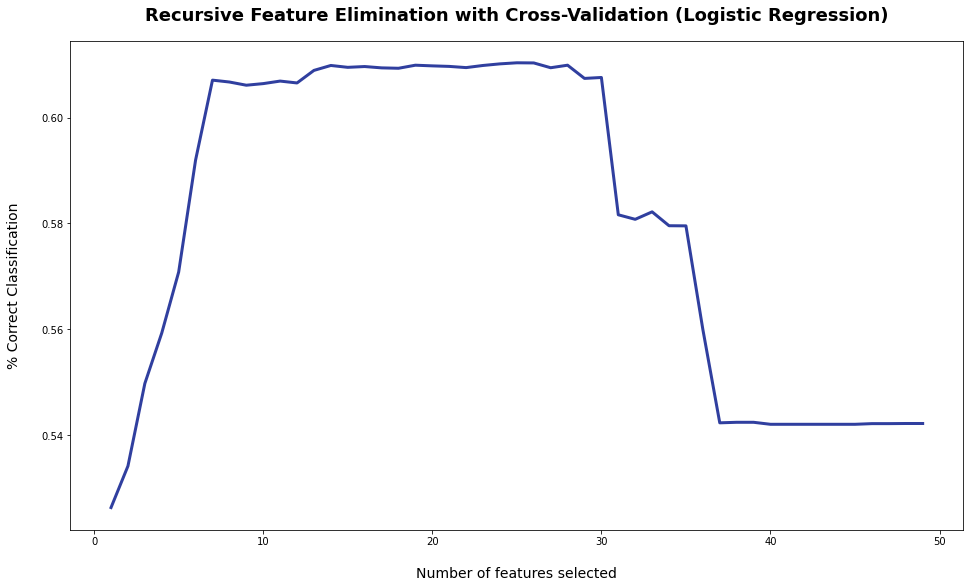

25
[' n_tokens_title' ' average_token_length' ' num_keywords'
 ' data_channel_is_entertainment' ' data_channel_is_socmed'
 ' data_channel_is_tech' ' data_channel_is_world' ' kw_min_min'
 ' kw_max_min' ' kw_min_max' ' kw_avg_max' ' kw_min_avg' ' kw_max_avg'
 ' weekday_is_monday' ' weekday_is_tuesday' ' weekday_is_wednesday'
 ' weekday_is_thursday' ' weekday_is_saturday' ' weekday_is_sunday'
 ' is_weekend' ' LDA_01' ' LDA_03' ' LDA_04' ' title_subjectivity'
 ' title_sentiment_polarity']



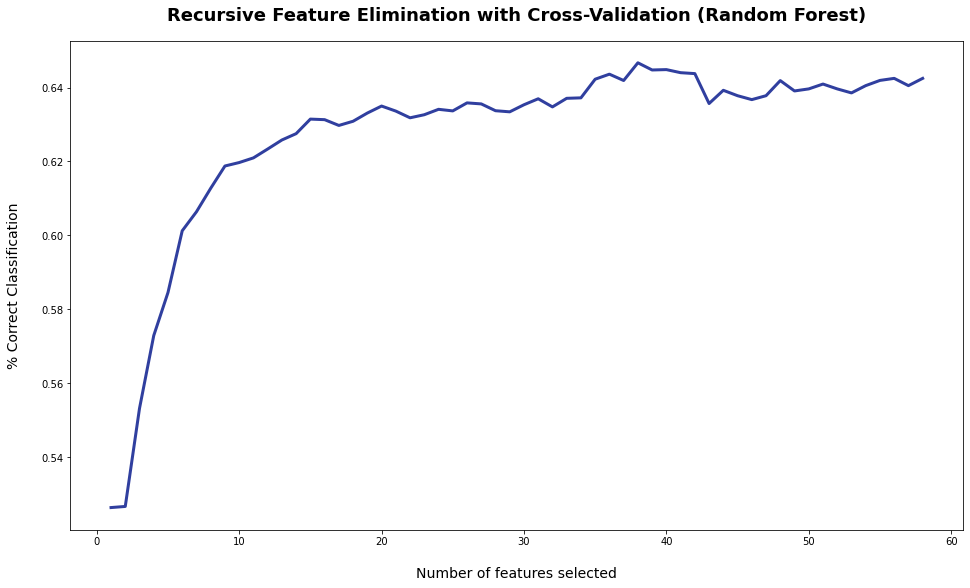

38
[' n_tokens_title' ' n_tokens_content' ' n_unique_tokens'
 ' n_non_stop_unique_tokens' ' num_hrefs' ' num_self_hrefs' ' num_imgs'
 ' average_token_length' ' kw_max_min' ' kw_avg_min' ' kw_min_max'
 ' kw_avg_max' ' kw_min_avg' ' kw_max_avg' ' kw_avg_avg'
 ' self_reference_min_shares' ' self_reference_max_shares'
 ' self_reference_avg_sharess' ' is_weekend' ' LDA_00' ' LDA_01' ' LDA_02'
 ' LDA_03' ' LDA_04' ' global_subjectivity' ' global_sentiment_polarity'
 ' global_rate_positive_words' ' global_rate_negative_words'
 ' rate_positive_words' ' rate_negative_words' ' avg_positive_polarity'
 ' min_positive_polarity' ' avg_negative_polarity'
 ' min_negative_polarity' ' max_negative_polarity' ' title_subjectivity'
 ' title_sentiment_polarity' ' abs_title_subjectivity']


In [80]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation (Logistic Regression)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(lr_select.grid_scores_) + 1), lr_select.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

print(feature_news_df.columns.values[lr_select.ranking_==1].shape[0])
print(feature_news_df.columns.values[lr_select.ranking_==1])
lr_features = feature_news_df[feature_news_df.columns.values[lr_select.ranking_==1]]
print()

plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation (Random Forest)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfc_select.grid_scores_) + 1), rfc_select.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

print(news_df.drop(columns=' shares').columns.values[rfc_select.ranking_==1].shape[0])
print(news_df.drop(columns=' shares').columns.values[rfc_select.ranking_==1])
rfc_features = news_df.drop(columns=' shares')[news_df.drop(columns=' shares').columns.values[rfc_select.ranking_==1]]

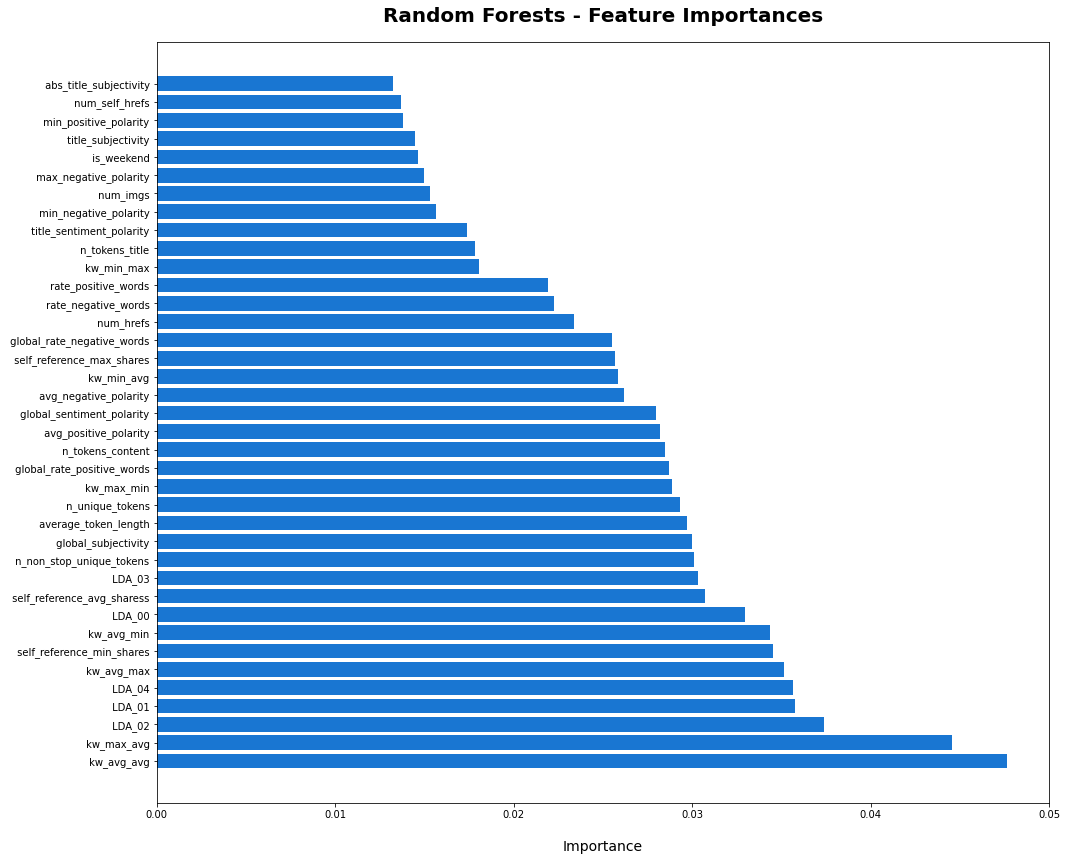

In [81]:
# Feature Importance Plot (Random Forest)

dset = pd.DataFrame()
dset['attr'] = rfc_features.columns
dset['importance'] = rfc_select.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('Random Forests - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

##Optimizing Feature Selection Algorithms

In [82]:
# Before moving on an actually testing supervised learning models, I think I can optimize the feature selection models
# to get the most optimal features we can use for machine learning.

# First, split data into training and test sets
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, roc_curve, fbeta_score, auc, classification_report
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(lr_features, class_news[' shares'], test_size=0.1, 
                                                                random_state=0)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(rfc_features, class_news[' shares'], test_size=0.1, 
                                                                random_state=0)
print('There are {:d} training samples and {:d} test samples'.format(X_train_lr.shape[0], X_test_lr.shape[0]))

There are 35679 training samples and 3965 test samples


In [83]:
lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter=1000, random_state=0)
lr.fit(X_train_lr, y_train_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train_rf,y_train_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [85]:
y_pred_lr = lr.predict(X_test_lr)
confusion_lr = confusion_matrix(y_test_lr,y_pred_lr)

print(confusion_lr)
print(classification_report(y_test_lr,y_pred_lr))
print('Accuracy of Logistic Regression: {:.4f}'.format(metrics.accuracy_score(y_test_lr, y_pred_lr)))

[[ 548 1334]
 [ 489 1594]]
              precision    recall  f1-score   support

           0       0.53      0.29      0.38      1882
           1       0.54      0.77      0.64      2083

    accuracy                           0.54      3965
   macro avg       0.54      0.53      0.51      3965
weighted avg       0.54      0.54      0.51      3965

Accuracy of Logistic Regression: 0.5402


In [86]:
y_pred_rf = rfc.predict(X_test_rf)
confusion_rfc = confusion_matrix(y_test_rf,y_pred_rf)

print(confusion_rfc)
print(classification_report(y_test_rf,y_pred_rf))
print('Accuracy of Random Forest Classifier: {:.4f}'.format(metrics.accuracy_score(y_test_rf, y_pred_rf)))

[[1110  772]
 [ 552 1531]]
              precision    recall  f1-score   support

           0       0.67      0.59      0.63      1882
           1       0.66      0.73      0.70      2083

    accuracy                           0.67      3965
   macro avg       0.67      0.66      0.66      3965
weighted avg       0.67      0.67      0.66      3965

Accuracy of Random Forest Classifier: 0.6661


###Confusion Matrix Visualization

In [87]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

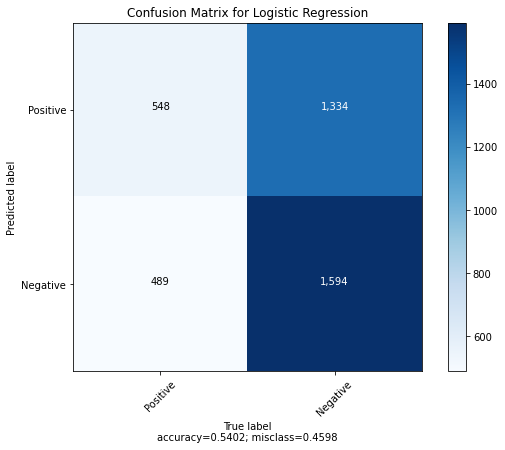

In [88]:
plot_confusion_matrix(cm=confusion_lr, target_names = ['Positive', 'Negative'], title = 'Confusion Matrix for Logistic Regression',normalize=False)

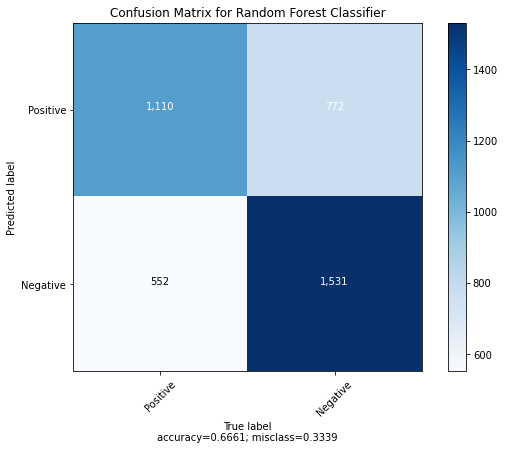

In [89]:
plot_confusion_matrix(cm=confusion_rfc, target_names = ['Positive', 'Negative'], title = 'Confusion Matrix for Random Forest Classifier',normalize=False)

## Plot ROC Curve and AUC

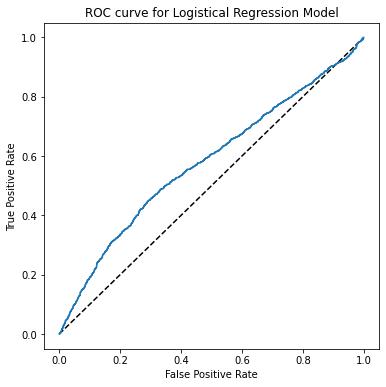

Area under the ROC curve: 0.579


In [90]:
probs = lr.predict_proba(X_test_lr)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_lr, probs)
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistical Regression Model')
plt.show()
auc = roc_auc_score(y_test_lr, probs)
print('Area under the ROC curve: {:.3f}'.format(auc))

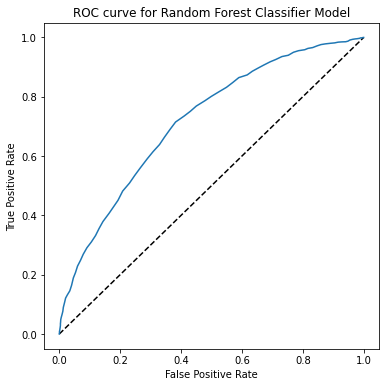

Area under the ROC curve: 0.718


In [91]:
probs = rfc.predict_proba(X_test_rf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_rf, probs)
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest Classifier Model')
plt.show()
auc = roc_auc_score(y_test_rf, probs)
print('Area under the ROC curve: {:.3f}'.format(auc))

With these extra tests, it is apparent that the Random Forest Classifier produces the most accurate models. For the machine learning approaches, I will use the 38 attributes suggested with the Random Forest Classifier.

#VI. Machine Learning Approaches: Model Building

##1. Regression

###Ordinary Least Squares

In [92]:
import statsmodels.api as sm

# Y is target variable
Y_ols = news_df[' shares']
# X is the feature set
X_ols = lr_features

X_train_ols, X_test_ols, y_train_ols, y_test_ols = train_test_split(X_ols, Y_ols, test_size=0.25,random_state=0)
X_train_ols = sm.add_constant(X_train_ols)

results = sm.OLS(y_train_ols, X_train_ols).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     16.66
Date:                Thu, 30 Jul 2020   Prob (F-statistic):           2.69e-69
Time:                        01:00:03   Log-Likelihood:            -3.2246e+05
No. Observations:               29733   AIC:                         6.450e+05
Df Residuals:                   29708   BIC:                         6.452e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [93]:
X_test_ols = sm.add_constant(X_test_ols)

y_pred_ols = results.predict(X_test_ols)


print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test_ols, y_pred_ols)))
print("Mean squared error of the prediction is: {}".format(mse(y_test_ols, y_pred_ols)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test_ols, y_pred_ols)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test_ols - y_pred_ols) / y_test_ols)) * 100))

Mean absolute error of the prediction is: 3040.582162332883
Mean squared error of the prediction is: 71399393.89076973
Root mean squared error of the prediction is: 8449.81620455556
Mean absolute percentage error of the prediction is: 229.2172438835217


###Lasso Regression

In [94]:
from sklearn.linear_model import LassoCV
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]
lasso_cv = LassoCV(alphas=alphas, cv=5)

# X is the feature set
# Y is target variable
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(lr_features, news_df[' shares'], test_size=0.1, 
                                                                random_state=0)

lasso_cv.fit(X_train_lasso, y_train_lasso)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train_lasso)
y_preds_test = lasso_cv.predict(X_test_lasso)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train_lasso, y_train_lasso)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test_lasso, y_test_lasso)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test_lasso, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test_lasso, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test_lasso, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test_lasso - y_preds_test) / y_test_lasso)) * 100))

Best alpha value is: 10.0
R-squared of the model in training set is: 0.012860403186791047
-----Test set statistics-----
R-squared of the model in test set is: 0.024782682673592737
Mean absolute error of the prediction is: 3105.6372716354945
Mean squared error of the prediction is: 66194782.83332863
Root mean squared error of the prediction is: 8136.017627397855
Mean absolute percentage error of the prediction is: 305.39824418168706


###Regression Summary

In [95]:
# All appear to be poor models for predicting news popularity

##2. Classification

###Random Forest

In [96]:
# Nothing new here. The model has already been performed on in the previous section

###Support Vector Machines

In [97]:
from sklearn.svm import SVC
svc = SVC()

X_svm = rfc_features.sample(frac=0.3, replace=True, random_state=0)
y_svm = class_news[' shares'].sample(frac=0.3, replace=True, random_state=0)
svc.fit(X_svm, y_svm)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [98]:
svc.score(X_svm,y_svm)

0.5785756327251325

#VII. Conclusion

With an accuracy of .6671, the Random Forest Classifier model appears to work best on predicting the popularity of a news article for Mashable